## import dependencies

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
from tkinter import filedialog

## load file using the gui popup

In [6]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load timestamp csv')

%gui tk

In [7]:
df = pd.read_csv(infiles[0])
df.tail(50)

,Experiment_Start,"(6, 'Stim_Start')","(7, 'Stim_Start')","(8, 'Stim_Start')","(9, 'Stim_Start')","(10, 'Stim_Start')","(11, 'Stim_Start')","(12, 'Stim_Start')","(13, 'Stim_Start')","(14, 'Stim_Start')",...,"(212, 'Stim_Start')","(213, 'Stim_Start')","(214, 'Stim_Start')","(215, 'Stim_Start')","(216, 'Stim_Start')","(217, 'Stim_Start')","(218, 'Stim_Start')","(219, 'Stim_Start')","(220, 'Stim_Start')","(221, 'Stim_Start')"
0,1.687872e+09,1.687873e+09,1.687873e+09,1.687873e+09,1.687873e+09,1.687873e+09,1.687873e+09,1.687873e+09,1.687873e+09,1.687873e+09,...,1.687874e+09,1.687874e+09,1.687874e+09,1.687874e+09,1.687874e+09,1.687874e+09,1.687874e+09,1.687874e+09,1.687874e+09,1.687874e+09


## compute time elapsed (detectable behavior start times)

In [16]:
# fmt = '%Y%m%d_%H:%M:%S:%f'
stim_time = []
tstamp_0 = df.iloc[0, 0]
print(tstamp_0)
for i in range(1, np.array(df).shape[1]):
#     print(i)
    try:
        
#         tstamp2 = datetime.strptime(np.array(df)[0, i], fmt)
        tstamp2 = np.array(df)[0, i]
        time_elapsed = tstamp2-tstamp_0
        stim_time.append(time_elapsed)
    except:
        pass
print(stim_time)

1687872490.4699724
[114.86268472671509, 115.296058177948, 177.70637321472168, 178.94257402420044, 357.8850119113922, 425.6296241283417, 426.05851793289185, 426.3329439163208, 438.49066042900085, 439.1642644405365, 440.5726890563965, 441.3097188472748, 441.7414770126343, 717.8214111328125, 718.9688091278076, 719.2290871143341, 719.901335477829, 722.0458045005798, 722.4601528644562, 723.7895982265472, 730.5569040775299, 732.3816726207733, 736.2682020664215, 737.1931350231171, 757.7129402160645, 759.8206875324249, 763.5811331272125, 949.358261346817, 956.2332081794739, 959.2488980293274, 986.2028775215149, 1017.4080069065094, 1017.9008328914642, 1018.878231048584, 1020.9563286304474, 1022.7011353969574, 1023.5604810714722, 1023.869811296463, 1076.7461850643158, 1077.6293361186981, 1079.9496302604675, 1090.9732027053833, 1098.6834313869476, 1103.0710394382477, 1104.2071416378021, 1105.917504310608, 1107.9323108196259, 1108.827590227127, 1109.8040144443512, 1114.3005421161652, 1117.08745312

## compute number of bouts from stim_time

In [15]:
# transforming stim_time into array of bouts
# (bout start time, duration of bout (number of stims)) len(bout_times) == bout count total 
bout_times = []

curr_index = 0 # current index of stim_time
stim_count = 0 # tracks stim count per bout
start_time = stim_time[0] # sets first value (can't compare 0th index to prev)
while (curr_index < len(stim_time)-1):
    curr_index += 1 
    stim_count += 1
    if (stim_time[curr_index] >= 300) and (stim_time[curr_index] <= 2100):
        bout = (start_time, stim_count)
        if (stim_time[curr_index] - stim_time[curr_index-1]) > 0.01: # if the difference is greater than 1/100 of a sec, new bout
            bout_times.append(bout)
            start_time = stim_time[curr_index]
            stim_count = 0
        if (curr_index == len(stim_time)-1): # accounts for the last value
            stim_count += 1
            bout = (start_time, stim_count)
            bout_times.append(bout)
print(bout_times)            
print("There are", len(bout_times), "total bouts")

[(114.86268472671509, 4), (357.8850119113922, 1), (425.6296241283417, 1), (426.05851793289185, 1), (426.3329439163208, 1), (438.49066042900085, 1), (439.1642644405365, 1), (440.5726890563965, 1), (441.3097188472748, 1), (441.7414770126343, 1), (717.8214111328125, 1), (718.9688091278076, 1), (719.2290871143341, 1), (719.901335477829, 1), (722.0458045005798, 1), (722.4601528644562, 1), (723.7895982265472, 1), (730.5569040775299, 1), (732.3816726207733, 1), (736.2682020664215, 1), (737.1931350231171, 1), (757.7129402160645, 1), (759.8206875324249, 1), (763.5811331272125, 1), (949.358261346817, 1), (956.2332081794739, 1), (959.2488980293274, 1), (986.2028775215149, 1), (1017.4080069065094, 1), (1017.9008328914642, 1), (1018.878231048584, 1), (1020.9563286304474, 1), (1022.7011353969574, 1), (1023.5604810714722, 1), (1023.869811296463, 1), (1076.7461850643158, 1), (1077.6293361186981, 1), (1079.9496302604675, 1), (1090.9732027053833, 1), (1098.6834313869476, 1), (1103.0710394382477, 1), (11

Total number of stimulations: 216


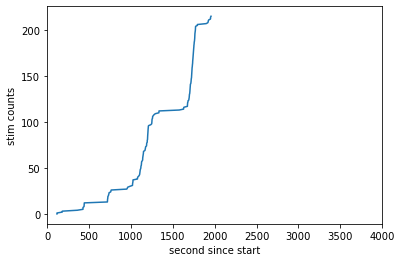

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(stim_time), np.arange(len(stim_time)))
ax.set_ylabel('stim counts')
ax.set_xlabel('second since start')
ax.set_xlim([0, 4000])

total_stims = len(stim_time)
print("Total number of stimulations:", total_stims)

# Calculates number of stims during the stim portion of the trial

In [11]:
filtered_stim_time = []
tstamp_0 = df.iloc[0, 0]
print(tstamp_0)

for i in range(1, np.array(df).shape[1]):
    try:
        tstamp2 = np.array(df)[0, i]
        time_elapsed = tstamp2 - tstamp_0
        if 300 <= time_elapsed < 2100:
            filtered_stim_time.append(time_elapsed)
    except:
        pass

print(len(filtered_stim_time))


1687872490.4699724
212


Total number of stimulations while light source is on: 212


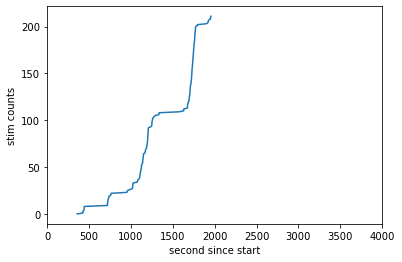

In [12]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.array(filtered_stim_time), np.arange(len(filtered_stim_time)))
ax.set_ylabel('stim counts')
ax.set_xlabel('second since start')
ax.set_xlim([0, 4000])

total_filtered_stims = len(filtered_stim_time)
print("Total number of stimulations while light source is on:", total_filtered_stims)

##### fig, ax = plt.subplots(1, 1)
ax.plot(np.array(stim_time), np.arange(len(stim_time)))
ax.set_ylabel('stim counts')
ax.set_xlabel('second since start')
# ax.vlines(np.where(np.array(stim_time) > 300)[0][0], 0, (np.array(stim_time)).max())
ax.set_xlim([0, (np.array(stim_time)).max()])

### plot, and save

In [9]:
# optional
#np.save('D:\Jack\Project\P16/102422/realtime_trial1_orientL.npy', np.array(stim_time))

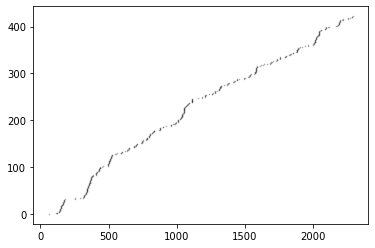

In [10]:
plt.scatter(stim_time, np.arange(len(stim_time)), c='k', s=0.3, alpha=0.3)

In [11]:
# bin by bin_size seconds
bin_size = 300
bin_start = np.arange(0, np.max(filtered_stim_time), bin_size)
bin_end = np.arange(bin_size, np.max(filtered_stim_time)+bin_size, bin_size)
print(bin_start, bin_end)
stim_binned_counts = []
for b in range(len(bin_start)):
    stim_binned_counts.append(len(np.where((filtered_stim_time >= bin_start[b]) & (filtered_stim_time < bin_end[b]))[0]))

[   0.  300.  600.  900. 1200. 1500. 1800.] [ 300.  600.  900. 1200. 1500. 1800. 2100.]


## generating a figure and saving it

C:\Users\Yttri-Lab\AppData\Local\Temp\ipykernel_272620\647735799.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(exp_paradigm)


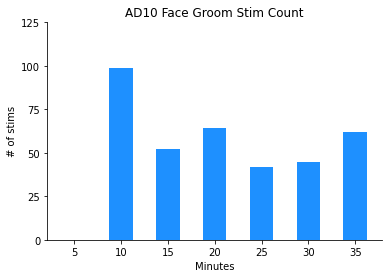

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
exp_paradigm = ['0','5','10','15','20','25','30','35']
paradigm_colors = ['khaki', 'dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue']
# bar(x, y)
ax.bar(np.arange(len(stim_binned_counts)),
       stim_binned_counts, color=paradigm_colors, width=0.5)
ax.set_title('AD10 Face Groom Stim Count')
ax.set_ylabel('# of stims')
ax.set_xlabel('Minutes')
# ax.xlabel(f'bin number ({bin_size} sec)')
#ax.set_xticks(np.arange(0, 35,5))
ax.set_xticklabels(exp_paradigm)
ax.set_yticks(np.arange(0, 150, 25))
ax.spines[['right', 'top']].set_visible(False)

In [14]:
fig.savefig('../temp_figures/p16_011223_realtime.png', dpi=600)

In [15]:
print(f'animal performs this behavior around {np.mean(stim_binned_counts)/bin_size}Hz')

animal performs this behavior around 0.10095238095238095Hz
